In [17]:
import tidy3d as td



# size of simulation domain
Lx, Ly, Lz = 2, 2, 2
# Lx, Ly, Lz = 2,3,2
dl = 0.066667

# waveguide information
wg_permittivity = 3.47**2
plane_size = (4, 0, 3.5)

# central frequency
wvl_um = 1.55

# automatic grid specification
# grid_spec = td.GridSpec.auto(min_steps_per_wvl=20, wavelength=wvl_um)
grid_spec = td.GridSpec.uniform(dl=dl)
# mesh = td.TriangleMesh.from_stl("./models/busted.stl")
mesh = td.TriangleMesh.from_stl("./wg.stl", scale=1)

tmesh = mesh.trimesh
tmesh.rezero()
tmesh.apply_translation(-tmesh.centroid)

bmesh = tmesh.bounding_box
bmesh.visual.face_colors = [115, 112, 255, 100]
print("center:", mesh.bounding_box.center)
print("size:", mesh.bounding_box.size)

# (tmesh).show(viewer='gl')

geometry = mesh

geometry2 = td.Box(center=(0.2, 0, 0), size=(0.5,1,1))

center: (6.44183734133108e-10, 4.72617393276753e-08, 0.0033979434432251376)
size: (0.499999940396, 0.40000000596, 0.22000046074399998)


<Axes: title={'center': 'cross section at z=0.00'}, xlabel='x', ylabel='y'>

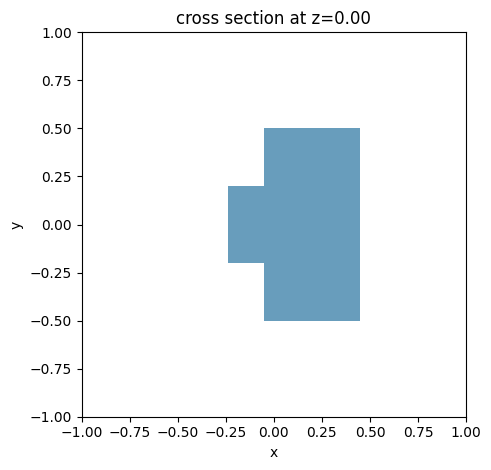

In [18]:

waveguide = td.Structure(
    geometry=geometry,
    medium=td.Medium(permittivity=wg_permittivity),
)

waveguide2 = td.Structure(
    geometry=geometry2,
    medium=td.Medium(permittivity=wg_permittivity),
)

sim = td.Simulation(
    medium=td.Medium(permittivity=1.444**2),
    size=(Lx, Ly, Lz),
    grid_spec=grid_spec,
    structures=[waveguide, waveguide2],
    run_time=1e-12,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
)

sim.plot(z=0.0)

use sim to generate spatial medium

In [19]:

plane = td.Box(center=(0, 0, 0), size=(4, 0, 3.5))
mode_spec = td.ModeSpec(
    num_modes=3,
)
from tidy3d.constants import C_0
from tidy3d.plugins.mode.mode_solver import ModeSolver
import numpy as np
# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3
num_freqs = 11
f0_ind = num_freqs // 2
freqs = np.linspace(freq0 - fwidth / 2, freq0 + fwidth / 2, num_freqs)

mode_solver = ModeSolver(
    simulation=sim,
    plane=plane,
    mode_spec=mode_spec,
    freqs=freqs,
)
mode_data = mode_solver.solve()


11:00:28 中国标准时间 WARNING: Client-side permittivity of a 'TriangleMesh' may 
                      be inaccurate if the mesh is not unionized. We recommend  
                      unionizing all meshes before import. A                    
                      'PermittivityMonitor' can be used to obtain the true      
                      permittivity and check that the surface mesh is loaded    
                      correctly.                                                

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

11:00:29 中国标准时间 WARNING: Client-side permittivity of a 'TriangleMesh' may 
                      be inaccurate if the mesh is not unionized. We recommend  
                      unionizing all meshes before import. A                    
                      'PermittivityMonitor' can be used to obtain the true      
                      permittivity and check that the surface mesh is loaded    
                      correctly.                                                

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

11:00:30 中国标准时间 WARNING: Client-side permittivity of a 'TriangleMesh' may 
                      be inaccurate if the mesh is not unionized. We recommend  
                      unionizing all meshes before import. A                    
                      'PermittivityMonitor' can be used to obtain the true      
                      permittivity and check that the surface mesh is loaded    
                      correctly.                                                

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

11:00:31 中国标准时间 WARNING: Client-side permittivity of a 'TriangleMesh' may 
                      be inaccurate if the mesh is not unionized. We recommend  
                      unionizing all meshes before import. A                    
                      'PermittivityMonitor' can be used to obtain the true      
                      permittivity and check that the surface mesh is loaded    
                      correctly.                                                

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

                WARNING: Client-side permittivity of a 'TriangleMesh' may be    
                inaccurate if the mesh is not unionized. We recommend unionizing
                all meshes before import. A 'PermittivityMonitor' can be used to
                obtain the true permittivity and check that the surface mesh is 
                loaded correctly.                                               

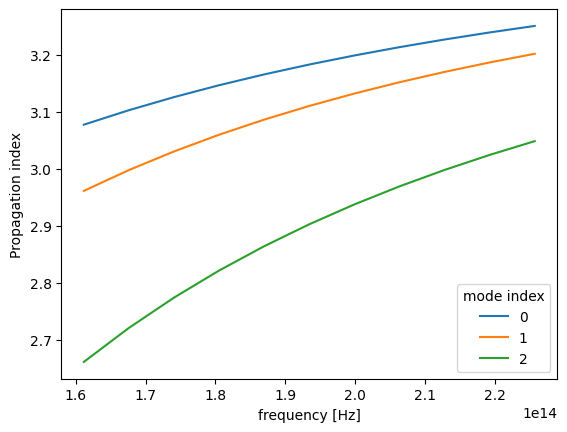

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
n_eff = mode_data.n_eff  # real part of the effective mode index
n_eff.plot.line(x="f")
plt.show()


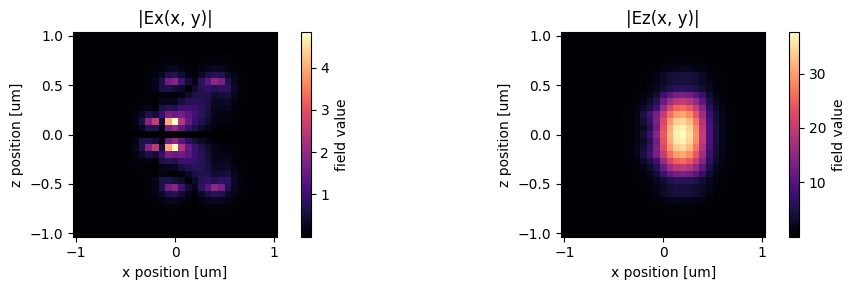

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
abs(mode_data.Ex.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ez.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax2, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ez(x, y)|")
ax2.set_aspect("equal")
plt.show()


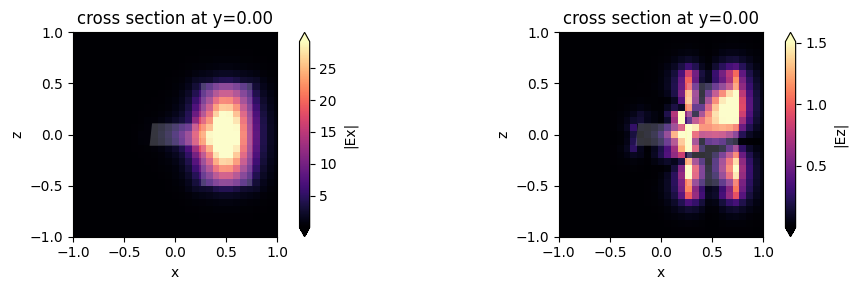

In [16]:
mode_index = 1
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
mode_solver.plot_field("Ex", "abs", mode_index=mode_index, f=freq0, ax=ax1)
mode_solver.plot_field("Ez", "abs", mode_index=mode_index, f=freq0, ax=ax2)
plt.show()


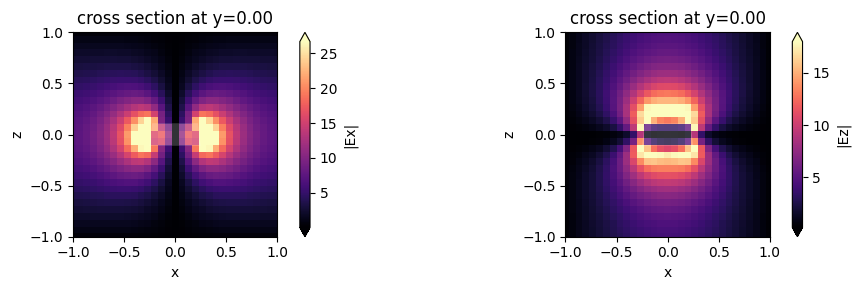

In [7]:
mode_index = 2
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
mode_solver.plot_field("Ex", "abs", mode_index=mode_index, f=freq0, ax=ax1)
mode_solver.plot_field("Ez", "abs", mode_index=mode_index, f=freq0, ax=ax2)
plt.show()
